In [20]:
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['refugee']
frame = ds.to_dataframe()
frame.rename(columns={'Country / territory of asylum/residence': 'Country'},inplace=True)



/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/kernel/__main__.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.


In [21]:
frame

,Country,Origin,Year,Month,Value
0,Australia,Afghanistan,1999,January,8
1,Australia,Afghanistan,1999,February,10
2,Australia,Afghanistan,1999,March,25
3,Australia,Afghanistan,1999,April,25
4,Australia,Afghanistan,1999,May,7
5,Australia,Afghanistan,1999,June,24
6,Australia,Afghanistan,1999,July,30
7,Australia,Afghanistan,1999,August,15
8,Australia,Afghanistan,1999,September,10
9,Australia,Afghanistan,1999,October,88


In [22]:
from datetime import datetime
frame["date_str"] = frame["Year"].map(str) + "-" + frame["Month"].map(str)

In [23]:
frame.head()


,Country,Origin,Year,Month,Value,date_str
0,Australia,Afghanistan,1999,January,8,1999-January
1,Australia,Afghanistan,1999,February,10,1999-February
2,Australia,Afghanistan,1999,March,25,1999-March
3,Australia,Afghanistan,1999,April,25,1999-April
4,Australia,Afghanistan,1999,May,7,1999-May


In [24]:
date_string = frame["date_str"]
dates_list = []
for date_str in date_string:
    d = datetime.strptime(date_str, '%Y-%B')
    dates_list.append(d)
frame["date"] = dates_list


In [25]:

del frame['Year']
del frame['Month']
del frame['date_str']
del frame['Country']
del frame['Origin']



In [26]:
import numpy as np
df1 = frame
a = df1["Value"]
value_list = []
for b in a:
    try: 
        int(b)
        value_list.append(int(b))
    except:
        value_list.append(0)
df1["Value"]= value_list
df1 = df1[(df1['date'] > '2006-12-01')]



In [27]:
df2 = df1.groupby("date").sum()
df2.to_csv()

'date,Value\n2007-01-01,25537\n2007-02-01,23945\n2007-03-01,25895\n2007-04-01,23879\n2007-05-01,23968\n2007-06-01,23105\n2007-07-01,23584\n2007-08-01,25400\n2007-09-01,25768\n2007-10-01,30028\n2007-11-01,28124\n2007-12-01,26538\n2008-01-01,29032\n2008-02-01,27330\n2008-03-01,25341\n2008-04-01,27192\n2008-05-01,26905\n2008-06-01,27676\n2008-07-01,31787\n2008-08-01,31296\n2008-09-01,35574\n2008-10-01,36640\n2008-11-01,32380\n2008-12-01,32659\n2009-01-01,31372\n2009-02-01,29733\n2009-03-01,31867\n2009-04-01,30196\n2009-05-01,29200\n2009-06-01,30711\n2009-07-01,31985\n2009-08-01,29144\n2009-09-01,31359\n2009-10-01,32707\n2009-11-01,31558\n2009-12-01,28888\n2010-01-01,26144\n2010-02-01,27405\n2010-03-01,30611\n2010-04-01,25543\n2010-05-01,25089\n2010-06-01,28627\n2010-07-01,27632\n2010-08-01,31271\n2010-09-01,33586\n2010-10-01,35095\n2010-11-01,33072\n2010-12-01,30582\n2011-01-01,29805\n2011-02-01,30426\n2011-03-01,35701\n2011-04-01,31944\n2011-05-01,38790\n2011-06-01,36821\n2011-07-01,3514

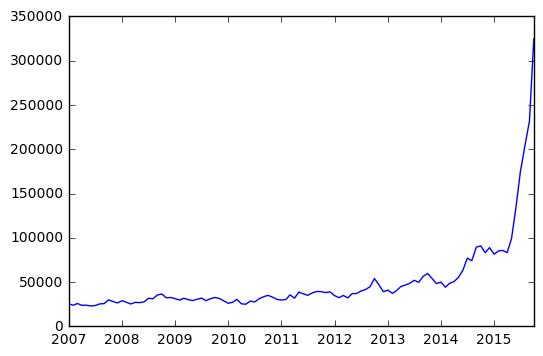

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
a=df2.index
date_list = []
plt.plot(a, df2["Value"])

ValueError: could not convert string to float: 

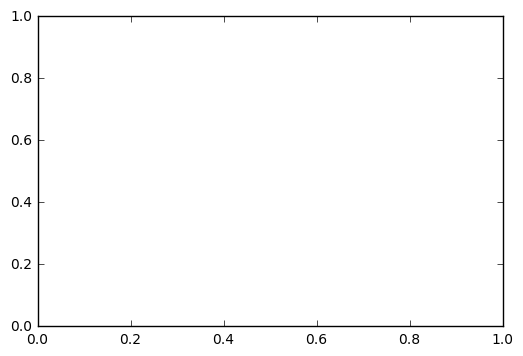